In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [57]:
df = pd.read_csv('/content/df_unido_num.csv')

In [ ]:
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

In [55]:
df.head()

,FAC_NO,YEAR,FAC_NO_YEAR,FACILITY_NAME,FAC_STR_ADDR,FAC_CITY,FAC_ZIP,FAC_OPERATED_THIS_YR,TRAUMA_CTR,TEACH_HOSP,...,a_disp_SN_IC_Care,a_disp_CAH,a_disp_Not_Defined_Elsewhere,a_disp_Childrens_or_Cancer,a_disp_Disaster_Care_Site,a_disp_Prison_Jail,a_DX_Residual,a_Zip_Foreign,dx_Factors_Influencing_Health_St,a_dx_Factors_Influencing_Health_
0,106010735,2012,1,28,165,1,226,2,10,1,...,0,0,0,0,0,0,0,0,0,0
1,106010735,2013,2,28,165,1,226,2,10,1,...,0,0,0,0,0,0,0,0,0,0
2,106010735,2014,3,28,165,1,226,2,10,1,...,0,0,0,0,0,0,0,0,0,0
3,106010735,2015,4,28,166,1,226,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,106010735,2016,5,28,166,1,226,2,10,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(3916, 481)

In [6]:
#Indica el porcentaje de test y la semilla
tamaño_test = 0.2
semilla = 42

In [7]:
# Definimos las X (var ind) y la Y (var dep)
X = df.drop('ER_TRAFFIC_TOT', axis=1)
y = df['ER_TRAFFIC_TOT']

In [8]:
# Separar en conjuntos de entrenamiento, validación y testeo (por ejemplo, 80% para entrenamiento, 20% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tamaño_test, random_state=semilla)

# Imprimir las formas de los conjuntos para verificar
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)

print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (3132, 480)
Forma de X_test: (784, 480)
Forma de y_train: (3132,)
Forma de y_test: (784,)


In [9]:
import re
# Replace special characters in column names with underscores
X_train.columns = [re.sub(r'[^\w]+', '_', col) for col in X_train.columns]
X_test.columns = [re.sub(r'[^\w]+', '_', col) for col in X_test.columns]
# Create a classifier LightGBM
lgbm = lgb.LGBMRegressor()

# Train the model
lgbm_fit = lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028258 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 68575
[LightGBM] [Info] Number of data points in the train set: 3132, number of used features: 455
[LightGBM] [Info] Start training from score 40126.537676


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

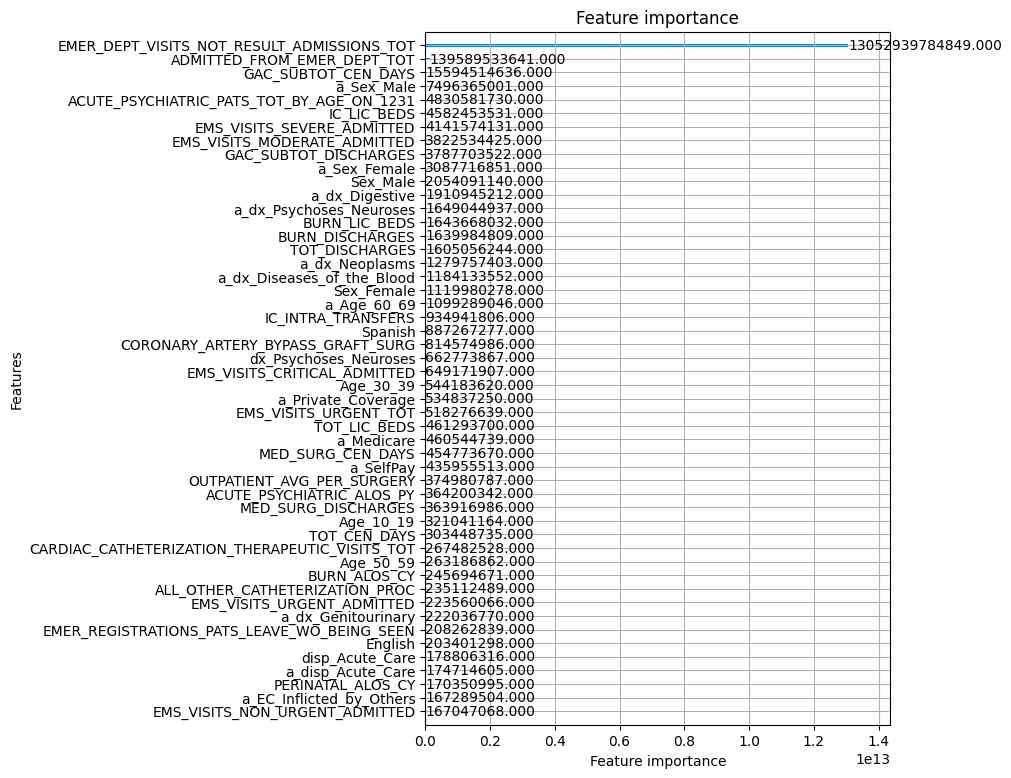

In [10]:
plt.rcParams['figure.figsize'] = (6, 9)
lgb.plot_importance(lgbm_fit, importance_type="gain", max_num_features=50)

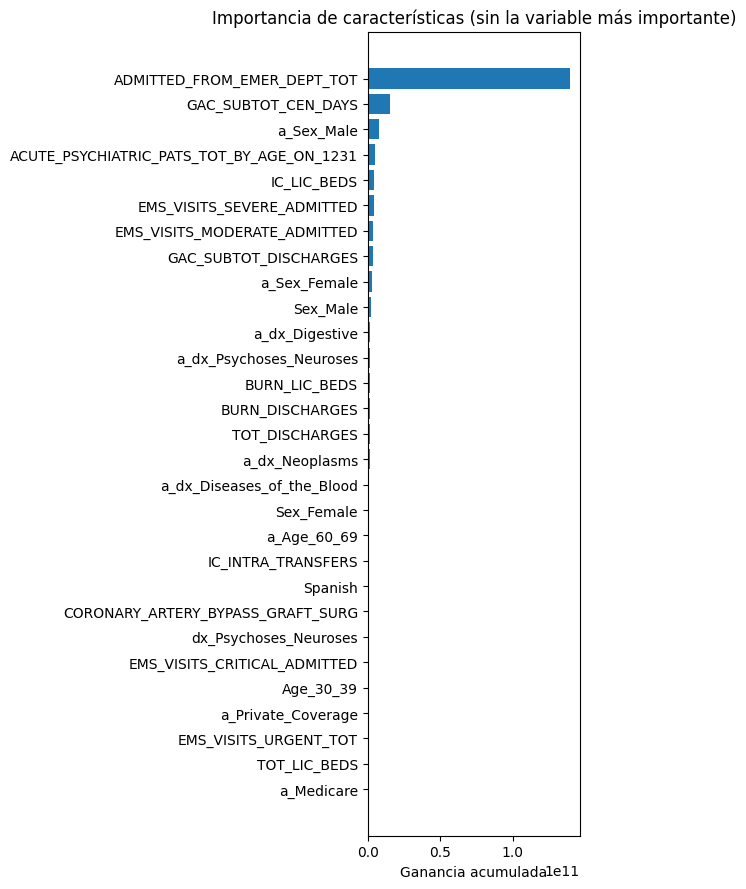

In [11]:
# Extraer la importancia de características (por ganancia)
importance_gain = lgbm_fit.booster_.feature_importance(importance_type='gain')
feature_names = lgbm_fit.booster_.feature_name()

# Crear un DataFrame
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importance_gain
})

# Ordenar por importancia
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Excluir la primera variable
importance_df_no_top = importance_df.iloc[1:30]  # Tomamos las siguientes 50 más importantes

# Plot manual para replicar el estilo de LightGBM
plt.figure(figsize=(6, 9))
plt.barh(
    importance_df_no_top['feature'][::-1],  # Invertimos el orden para que el más importante esté arriba
    importance_df_no_top['importance'][::-1]
)

plt.xlabel('Ganancia acumulada')
plt.title('Importancia de características (sin la variable más importante)')
plt.tight_layout()
plt.show()


In [13]:
# Obtener los valores de la predicción
y_train_pred = lgbm_fit.predict(X_train)
y_test_pred = lgbm_fit.predict(X_test)

# y_train_pred_proba = lgbm_fit.predict_proba(X_train)[:, 1]
# y_test_pred_proba = lgbm_fit.predict_proba(X_test)[:, 1]

In [14]:
y_train_pred

array([ 2862.50539531, 42198.74288539, 67842.36338197, ...,
       21822.07544422, 45665.01630127, 20836.76000941])

In [15]:
y_test_pred

array([ 5.39244697e+04,  1.85665595e+04,  3.60172419e+04,  5.10527684e+04,
        6.84917582e+04,  6.05346981e+04,  2.18892364e+04,  4.42400818e+04,
        4.93639748e+04,  7.05504085e+04,  5.21588858e+04,  7.11865179e+03,
        3.40702442e+04,  2.22544019e+04,  1.71424351e+04,  5.95348477e+04,
        6.47339904e+04,  7.80060940e+04,  4.61733423e+04,  4.17448685e+04,
        8.51682579e+04,  3.41969873e+04,  8.29880996e+03,  5.92153458e+04,
        3.51957721e+04,  1.03830425e+05, -4.20085616e+01,  7.13908645e+04,
        2.85463049e+04,  9.30159617e+04,  6.10245107e+04,  3.34459345e+04,
        2.59624271e+04,  4.05044585e+03,  4.32362793e+04,  4.25257140e+04,
        1.70935528e+04,  5.43461315e+04,  5.49483449e+03,  6.16887264e+03,
        3.52411405e+04,  8.16109216e+04,  3.61257041e+04,  2.88964729e+04,
        3.46768144e+04,  5.93263821e+04,  2.83504673e+04,  3.07583582e+04,
        3.56775572e+04,  2.70578140e+04,  5.39819120e+04,  1.06329548e+05,
        2.85305544e+04,  

In [68]:
# Definir los parámetros que deseas ajustar
best_params = {
    'learning_rate': 0.011,
    'num_leaves': 596,
    'max_depth': 28,
    'min_data_in_leaf': 21,
    'feature_fraction': 0.668,
    'bagging_fraction': 0.818,
    'bagging_freq': 2,
    'lambda_l1': 0.136,
    'lambda_l2': 7.247
}


In [64]:
# Entrenar el modelo final
final_model = lgb.LGBMRegressor(**best_params, n_estimators=1000)

final_model.fit(X_train, y_train)

LGBMRegressor(bagging_fraction=0.8177918518393865, bagging_freq=2,
              feature_fraction=0.6676843834839407,
              lambda_l1=0.13635117296712554, lambda_l2=7.246739073307229,
              learning_rate=0.010526977447749974, max_depth=28,
              min_data_in_leaf=21, n_estimators=1000, num_leaves=596)

In [69]:
# Predicciones
y_pred = final_model.predict(X_test)

# Métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

n = X_test.shape[0]  # Número de observaciones
p = X_test.shape[1]  # Número de predictores (features)
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Mostrar todas las métricas
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2: {r2:.4f}')
print(f'Adjusted R2: {adj_r2:.4f}')


RMSE: 2171.16
MAE: 651.64
R2: 0.9937
Adjusted R2: 0.9836


In [70]:
# Contar filas que tienen al menos un valor nulo
filas_con_nulos = tabla_final.isnull().any(axis=1).sum()
print(f"Número de filas con valores nulos: {filas_con_nulos}")


Número de filas con valores nulos: 0


In [71]:
# Extraemos los valores reales de 2022 y 2023
real_2022 = df[df['YEAR'] == 2022][['FAC_NO', 'ER_TRAFFIC_TOT']].rename(columns={'ER_TRAFFIC_TOT': 'REAL_2022'})
real_2023 = df[df['YEAR'] == 2023][['FAC_NO', 'ER_TRAFFIC_TOT']].rename(columns={'ER_TRAFFIC_TOT': 'REAL_2023'})

# Extraemos el FAC_NO del conjunto de test y añadimos la predicción
X_test_with_preds = X_test.copy()
X_test_with_preds['PREDICCION_2024'] = y_pred
X_test_with_preds.head()


,Unnamed_0,FAC_NO,YEAR,FAC_NO_YEAR,FACILITY_NAME,FAC_STR_ADDR,FAC_CITY,FAC_ZIP,FAC_OPERATED_THIS_YR,TRAUMA_CTR,...,a_disp_CAH,a_disp_Not_Defined_Elsewhere,a_disp_Childrens_or_Cancer,a_disp_Disaster_Care_Site,a_disp_Prison_Jail,a_DX_Residual,a_Zip_Foreign,dx_Factors_Influencing_Health_St,a_dx_Factors_Influencing_Health_,PREDICCION_2024
270,271,106070988,2019,271,188,120,233,244,2,5,...,0,1,11,0,10,7,4,0,0,54108.440693
1972,1973,106301209,2019,1972,180,136,85,135,2,10,...,0,0,0,0,2,1,0,0,0,18736.483025
802,803,106190148,2021,803,72,350,88,25,2,10,...,0,0,0,0,4,0,0,1388,1,37713.758556
2898,2899,106370780,2022,2898,513,301,143,95,2,10,...,58,58,2,0,311,0,1,1164,133,51528.385319
2846,2847,106370744,2017,2846,428,304,177,99,2,1,...,0,0,0,0,0,0,0,0,0,69992.262201


In [72]:
# Ahora hacemos un promedio (o sumamos si quieres), pero como dijiste que es un único valor por FAC_NO, agrupamos por FAC_NO
pred_df = X_test_with_preds.groupby('FAC_NO')['PREDICCION_2024'].mean().reset_index()

# Unimos todo en una tabla final
tabla_final = real_2022.merge(real_2023, on='FAC_NO', how='outer').merge(pred_df, on='FAC_NO', how='outer')

# Eliminamos las filas que tengan valores nulos en alguna columna
tabla_final = tabla_final.dropna()

# Sustituir FAN_NO por FAC_NAME
df_unido = pd.read_csv('/content/df_unido.csv')
hospitales_nombres = df_unido[['FAC_NO', 'FACILITY_NAME']].drop_duplicates()
tabla_final_con_nombre = tabla_final.merge(hospitales_nombres, on='FAC_NO', how='left')


# Tabla final
tabla_final_con_nombre = tabla_final_con_nombre[['FACILITY_NAME', 'REAL_2022', 'REAL_2023', 'PREDICCION_2024']]
tabla_final_con_nombre['PREDICCION_2024'] = tabla_final_con_nombre['PREDICCION_2024'].round(2)
tabla_final_con_nombre

,FACILITY_NAME,REAL_2022,REAL_2023,PREDICCION_2024
0,ALAMEDA HOSPITAL,16079.0,17654.0,14332.24
1,ALTA BATES SUMMIT MED CTR-ALTA BATES CAMPUS,34984.0,36972.0,45852.86
2,ALTA BATES SUMMIT MEDICAL CENTER-ALTA BATES CA...,34984.0,36972.0,45852.86
3,CHILDRENS HOSPITAL AND RESEARCH CTR AT OAKLAND,40681.0,42170.0,39868.06
4,CHILDRENS HOSPITAL AND RESEARCH CENTER AT OAKLAND,40681.0,42170.0,39868.06
...,...,...,...,...
438,ST. JOHN'S REGIONAL MEDICAL CENTER,54272.0,56657.0,53656.06
439,WOODLAND MEMORIAL HOSPITAL,17594.0,29711.0,20870.43
440,SUTTER DAVIS HOSPITAL,32195.0,34797.0,30081.17
441,RIDEOUT MEMORIAL HOSPITAL,66888.0,63577.0,62837.70


In [73]:
tabla_final_con_nombre.to_excel('tabla_final_con_nombre.xlsx', index=False)